In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("./users.csv")  # Update with actual file path

# Sample 2,000 users randomly
df = df.sample(n=2000, random_state=42).reset_index(drop=True)

# One-Hot Encode categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[["Country", "AgeGroup"]])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())

# Add UserID for reference
encoded_df["UserID"] = df["UserID"]

pd.set_option("display.max_colwidth", None)  # None means no truncation
# Show encoded dataframe
print(encoded_df.head(1))


   Country_Afghanistan  Country_Albania  Country_Algeria  \
0                  0.0              0.0              0.0   

   Country_American Samoa  Country_Andorra  Country_Angola  Country_Argentina  \
0                     0.0              0.0             0.0                0.0   

   Country_Armenia  Country_Australia  Country_Austria  ...  Country_Yemen  \
0              0.0                0.0              0.0  ...            0.0   

   Country_Zambia  Country_Zimbabwe  AgeGroup_18-24  AgeGroup_25-34  \
0             0.0               0.0             0.0             0.0   

   AgeGroup_35-44  AgeGroup_45-54  AgeGroup_55-64  AgeGroup_65-74  UserID  
0             0.0             0.0             1.0             0.0   75722  

[1 rows x 161 columns]


In [2]:
# Compute Cosine Similarity
cosine_sim_matrix = cosine_similarity(encoded_features, encoded_features)

# Convert to DataFrame for better visualization
similarity_df = pd.DataFrame(
    cosine_sim_matrix, index=df["UserID"], columns=df["UserID"]
)

# Save similarity matrix for later use
similarity_df.to_csv("./users_demographic_similarity_matrix.csv")

# Show sample
print(similarity_df.head())


UserID  75722  80185  19865  76700  92992  76435  84005  80918  60768  50075  \
UserID                                                                         
75722     1.0    0.0    0.0    0.5    0.0    0.0    0.5    0.5    0.0    0.0   
80185     0.0    1.0    0.0    0.0    0.0    0.5    0.0    0.0    0.0    0.5   
19865     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
76700     0.5    0.0    0.0    1.0    0.0    0.0    0.5    0.5    0.0    0.0   
92992     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.5    0.0   

UserID  ...  52299  55928  52003  981    35396  58381  44244  8746   96759  \
UserID  ...                                                                  
75722   ...    0.0    0.5    0.5    0.5    0.0    0.0    0.0    0.0    0.0   
80185   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.5    0.0    0.5   
19865   ...    0.5    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
76700   ...    0.0    0.5    0.5    0.5    0.0   

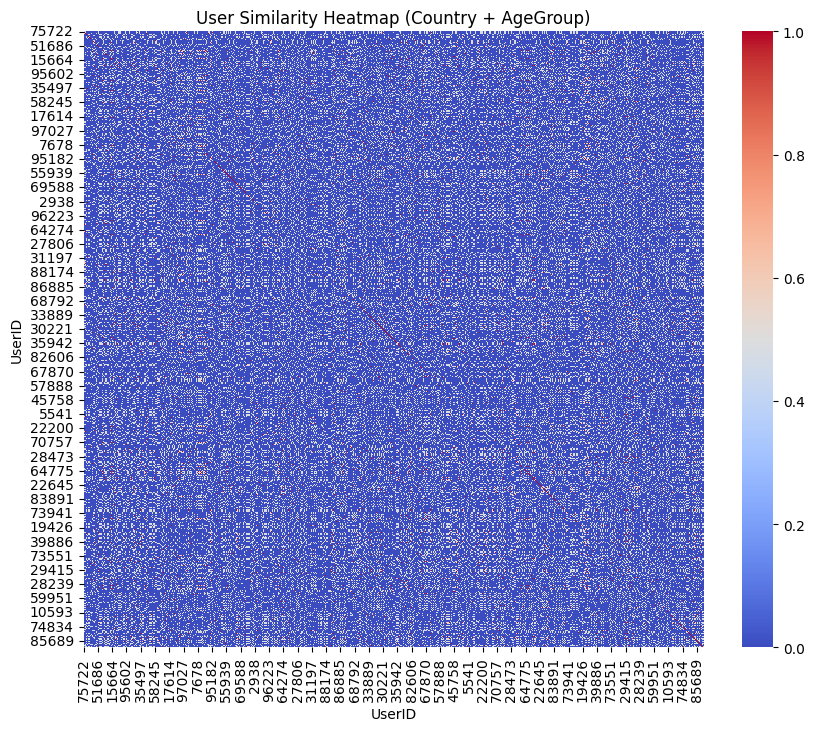

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", vmin=0, vmax=1)
plt.title("User Similarity Heatmap (Country + AgeGroup)")
plt.show()
